In [1]:
# project: p6
# submitter: apierrelouis
# partner: none
# hours: 12
import pandas as pd
import numpy as np
import geopandas
import rasterio
from rasterio.mask import mask
import shapely.geometry
import sqlite3
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import matplotlib.pyplot as plt
from rasterio.mask import mask
import sklearn.compose
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.impute
import sklearn.linear_model
import sklearn.metrics

In [2]:
#Q1
counties_gcs = geopandas.read_file("counties.geojson")
epsg = "EPSG:4326"
counties_gcs.value_counts().size

72

In [3]:
counties_gcs.head()

,NAME,POP100,geometry
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669..."
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422..."
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338..."
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379..."
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192..."


<AxesSubplot:>

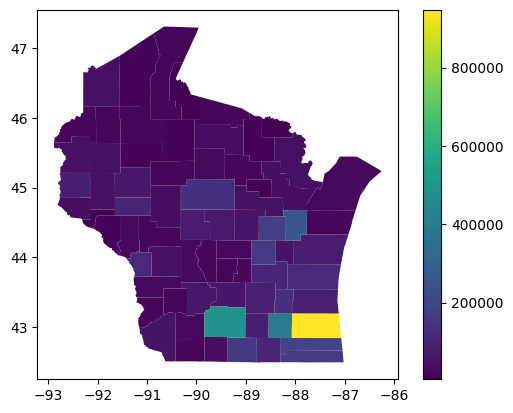

In [4]:
#Q2
counties = counties_gcs.to_crs(epsg)
counties.plot(counties["POP100"], legend=True)

In [5]:
#Feature 1
conn = sqlite3.connect("counties_tracts.db")
tables = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,counties,counties,2,"CREATE TABLE ""counties"" (\n""index"" INTEGER,\n ..."
1,index,ix_counties_index,counties,3,"CREATE INDEX ""ix_counties_index""ON ""counties"" ..."
2,table,tracts,tracts,4,"CREATE TABLE ""tracts"" (\n""index"" INTEGER,\n ""..."
3,index,ix_tracts_index,tracts,5,"CREATE INDEX ""ix_tracts_index""ON ""tracts"" (""in..."


In [6]:
count_tbl = pd.read_sql("""SELECT * FROM counties""", conn)
tract_tbl = pd.read_sql("""SELECT * FROM tracts""", conn)
count_tbl

,index,NAME,COUNTY,AREALAND,AREAWATER
0,0,Racine County,101,861533739,1190103013
1,1,Clark County,019,3133378070,23239614
2,2,Wood County,141,2054044751,41994799
3,3,Rusk County,107,2366092584,44813690
4,4,Ozaukee County,089,603514413,2287415379
...,...,...,...,...,...
67,67,Washburn County,129,2064515991,145563849
68,68,Monroe County,081,2333270295,18986835
69,69,Richland County,103,1518120276,8153423
70,70,Price County,099,3248866440,62102368


In [7]:
counties_gcs = counties_gcs.merge(count_tbl[["NAME","AREALAND"]],on="NAME")
counties_gcs

,NAME,POP100,geometry,AREALAND
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413
...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440


In [8]:
x, y = counties_gcs[["NAME", "AREALAND"]], counties_gcs["POP100"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=250)
model = sklearn.linear_model.LinearRegression()
model.fit(x_train[["AREALAND"]], y_train)
#y_pred = model.predict(x_test[["AREALAND"]])

LinearRegression()

In [9]:
#Q3
x_test["NAME"].tolist()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [10]:
#Q4
model.score(x_test[["AREALAND"]],y_test)

0.016720430179409274

In [11]:
#Q5
#Land area is m^2
pred = 2.59e6*400
model.predict([[pred]])[0]

/home/apierrelouis/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90000.07422783462

In [12]:
#Feature 2
tracts_counties = tract_tbl.merge(count_tbl, on="COUNTY")
tracts_counties

,index_x,NAME_x,COUNTY,HU100,index_y,NAME_y,AREALAND,AREAWATER
0,0,Census Tract 9701.01,085,2760,32,Oneida County,2883704998,317571193
1,1,Census Tract 9710.01,085,1536,32,Oneida County,2883704998,317571193
2,2,Census Tract 9706.01,085,1208,32,Oneida County,2883704998,317571193
3,3,Census Tract 9706.02,085,3136,32,Oneida County,2883704998,317571193
4,982,Census Tract 9701.02,085,3254,32,Oneida County,2883704998,317571193
...,...,...,...,...,...,...,...,...
1404,1379,Census Tract 1004,057,2125,17,Juneau County,1986423963,96036696
1405,1380,Census Tract 1002,057,1778,17,Juneau County,1986423963,96036696
1406,1381,Census Tract 1006,057,1624,17,Juneau County,1986423963,96036696
1407,1382,Census Tract 1005,057,1906,17,Juneau County,1986423963,96036696


In [13]:
county_tracts = tracts_counties[["HU100","NAME_y"]].groupby("NAME_y", as_index=False).sum().rename(columns={"NAME_y":"NAME"})
county_tracts

,NAME,HU100
0,Adams County,17436
1,Ashland County,9656
2,Barron County,23614
3,Bayfield County,12999
4,Brown County,104371
...,...,...
67,Waukesha County,160864
68,Waupaca County,25396
69,Waushara County,14843
70,Winnebago County,73329


In [14]:
counties_gcs = counties_gcs.merge(county_tracts[["NAME","HU100"]],on="NAME")
counties_gcs

,NAME,POP100,geometry,AREALAND,HU100
0,Racine County,195408,"POLYGON ((-88.07073 42.66976, -88.06897 42.669...",861533739,82164
1,Clark County,34690,"POLYGON ((-90.55875 44.42221, -90.53398 44.422...",3133378070,15076
2,Wood County,74749,"POLYGON ((-89.72464 44.33712, -89.72460 44.338...",2054044751,34088
3,Rusk County,14755,"POLYGON ((-90.92517 45.37935, -90.92515 45.379...",2366092584,8883
4,Ozaukee County,86395,"POLYGON ((-87.89269 43.19202, -87.89265 43.192...",603514413,36267
...,...,...,...,...,...
67,Washburn County,15911,"POLYGON ((-91.55065 46.07034, -91.55065 46.070...",2064515991,12979
68,Monroe County,44673,"POLYGON ((-90.55246 43.72565, -90.55096 43.725...",2333270295,19204
69,Richland County,18021,"POLYGON ((-90.31107 43.55399, -90.31108 43.553...",1518120276,8868
70,Price County,14159,"POLYGON ((-90.04485 45.81765, -90.04440 45.830...",3248866440,11120


In [15]:
x, y = counties_gcs[["NAME", "HU100"]], counties_gcs["POP100"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=250)
model = sklearn.linear_model.LinearRegression()
model.fit(x_train[["HU100"]], y_train)
#y_pred = model.predict(x_test[["HU100"]])

LinearRegression()

In [16]:
#Q6
x_test["NAME"].tolist()

['Dane County',
 'Juneau County',
 'Taylor County',
 'Vilas County',
 'Rusk County',
 'Price County',
 'Jackson County',
 'Waushara County',
 'Pepin County',
 'Douglas County',
 'Ashland County',
 'Milwaukee County',
 'Waupaca County',
 'Richland County',
 'Lafayette County',
 'Washburn County',
 'Dunn County',
 'Bayfield County']

In [17]:
#Q7
q7 = x_test.set_index("NAME").to_dict()
q7["HU100"]

{'Dane County': 216022,
 'Juneau County': 14669,
 'Taylor County': 10582,
 'Vilas County': 25116,
 'Rusk County': 8883,
 'Price County': 11120,
 'Jackson County': 9727,
 'Waushara County': 14843,
 'Pepin County': 3579,
 'Douglas County': 22825,
 'Ashland County': 9656,
 'Milwaukee County': 418053,
 'Waupaca County': 25396,
 'Richland County': 8868,
 'Lafayette County': 7230,
 'Washburn County': 12979,
 'Dunn County': 17964,
 'Bayfield County': 12999}

In [18]:
#Q8
cv_scores = sklearn.model_selection.cross_val_score(model, x_train[["HU100"]], y_train, cv=5,scoring='r2')
#cv_mean = cv_scores.mean()
#cv_mean
cv_scores.mean()

0.9739348181232653

In [19]:
#Q9
#sqdev = lambda x: (x-cv_mean)**2
#devs = np.array([sqdev(x) for x in cv_scores])
#np.sqrt(np.mean(devs))
cv_scores.std()

0.01693954236334351

In [20]:
#Q10
slope = round(model.coef_[0],2)
intercept = round(model.intercept_,2)
f"POP100 = {slope}*HU100 + {intercept}"

'POP100 = 2.47*HU100 + -9276.89'

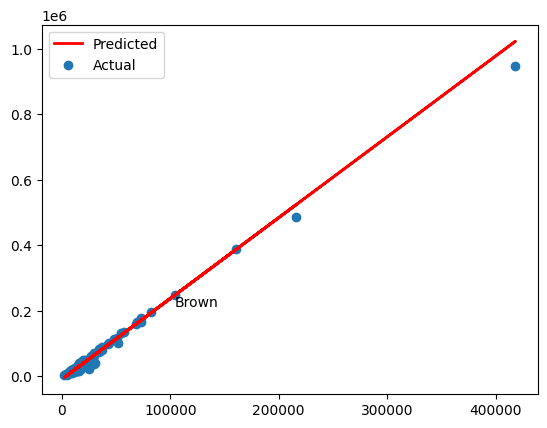

In [21]:
#Q11
y_pred = model.predict(x[["HU100"]])
brown_hu100 = counties_gcs.set_index("NAME").loc["Brown County"]["HU100"]
brown_pop100 = counties_gcs.set_index("NAME").loc["Brown County"]["POP100"]

plt.plot(x["HU100"], y_pred, linewidth=2, color="red", label="Predicted")
plt.scatter(x["HU100"], y, label="Actual")
plt.annotate('Brown',xy=(brown_hu100,brown_pop100), horizontalalignment='left', verticalalignment='top')
plt.legend(loc="upper left")

In [22]:
#Q12
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
count = 0
for row in A:
    for a in row:
        count += (a>=3 and a<=6).astype(int)
count

8

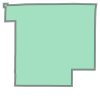

In [23]:
brown_county = counties_gcs.set_index("NAME").loc["Brown County"]
brown_county["geometry"]

In [24]:
from matplotlib.colors import ListedColormap

c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)

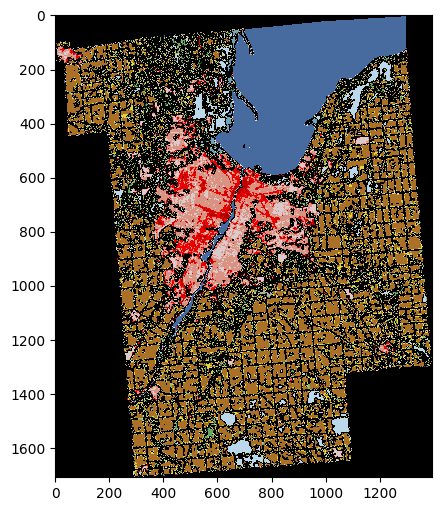

In [25]:
#Q13
with rasterio.open("zip://../p6/land.zip!wi.tif") as land:
    brown_geom = counties_gcs.to_crs(land.crs).set_index("NAME").loc["Brown County"]["geometry"]
    matrix, _ = mask(land, [brown_geom], crop=True)
matrix = matrix[0]
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(matrix, vmin=0, vmax=255, cmap=custom_cmap)

In [26]:
#Q14
#water = np.count_nonzero(matrix==11)
#total = np.count_nonzero(matrix)
### above code does not work for tester ###
total = 0
water = 0
for row in matrix:
    for cell in row:
        if cell:
            if cell == 11:
                water += 1
            total += 1
water/total

0.13797526789725206

Text(0, 0.5, 'POP')

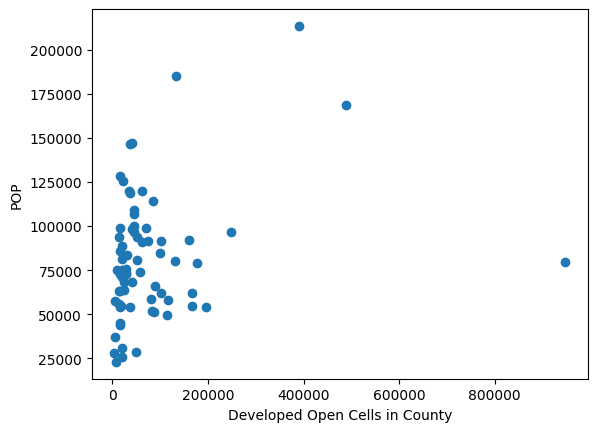

In [27]:
#Q15
#developed open == 21
code = 21
cell_count_list = []
with rasterio.open("zip://../p6/land.zip!wi.tif") as land:
    for county in counties["NAME"]:
        geom = counties_gcs.to_crs(land.crs).set_index("NAME").loc[county]["geometry"]
        matrix, _ = mask(land, [geom], crop=True)
        matrix = matrix[0]
        count = np.count_nonzero(matrix==21)
        cell_count_list.append(count)
counties["DEV_OPEN_COUNT"] = cell_count_list
plt.scatter(counties["POP100"], counties["DEV_OPEN_COUNT"])
plt.xlabel("Developed Open Cells in County")
plt.ylabel("POP")

In [28]:
#Part1
tracts_gpd = geopandas.read_file("tracts.shp")
tracts = tracts_gpd.to_crs(tracts_gpd.crs)
tracts

,GEOID,POP100,geometry
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02627 44.089..."
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15010 44.513..."
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53547 44.334..."
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.89338 44.678..."
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.05841 44.461..."
...,...,...,...
1537,55139003100,2046,"POLYGON ((-88.47454 44.19198, -88.47450 44.192..."
1538,55079017900,2879,"POLYGON ((-87.91064 42.99520, -87.91038 42.995..."
1539,55059000800,2763,"POLYGON ((-87.84574 42.60276, -87.84548 42.602..."
1540,55025013700,7107,"POLYGON ((-89.57788 42.98135, -89.57788 42.981..."


In [29]:
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}

In [30]:
# with rasterio.open("zip://../p6/land.zip!wi.tif") as land:
#     for use in land_use:
#         code = land_use[use]
#         cell_count_list = []
#         for geoid in tracts["GEOID"]:
#             geom = tracts.to_crs(land.crs).set_index("GEOID").loc[geoid]["geometry"]
#             matrix, _ = mask(land, [geom], crop=True)
#             matrix = matrix[0]
#             count = np.count_nonzero(matrix==code)
#             cell_count_list.append(count)
#         tracts[use] = cell_count_list

In [31]:
for use in land_use:
    tracts[use] = np.nan
tracts

,GEOID,POP100,geometry,open_water,ice_snow,developed_open,developed_low,developed_med,developed_high,barren,...,dwarf_scrub,shrub_scrub,grassland,sedge,lichens,moss,pasture,crops,woody_wetlands,herbacious_wetlands
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02627 44.089...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15010 44.513...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53547 44.334...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.89338 44.678...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.05841 44.461...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,55139003100,2046,"POLYGON ((-88.47454 44.19198, -88.47450 44.192...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1538,55079017900,2879,"POLYGON ((-87.91064 42.99520, -87.91038 42.995...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1539,55059000800,2763,"POLYGON ((-87.84574 42.60276, -87.84548 42.602...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1540,55025013700,7107,"POLYGON ((-89.57788 42.98135, -89.57788 42.981...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
with rasterio.open("zip://../p6/land.zip!wi.tif") as land:
    idx = 0
    while idx < len(tracts.index):
        geom = tracts_gpd.to_crs(land.crs).iloc[idx]["geometry"]
        matrix, _ = mask(land, [geom], crop=True)
        matrix = matrix[0]
        for use in land_use:
            code = land_use[use]
            tracts.at[idx,use] = np.count_nonzero(matrix==code)
        idx += 1

<BarContainer object of 20 artists>

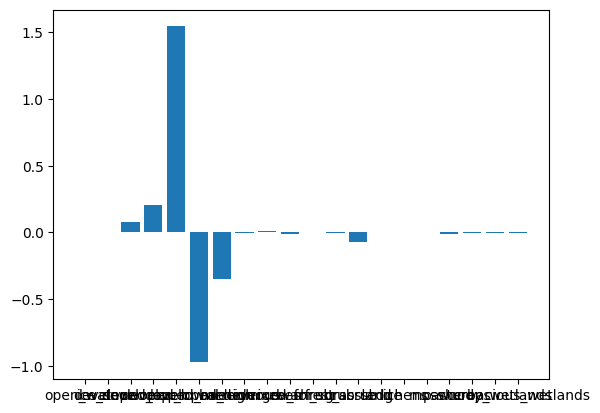

In [33]:
#Q16
features = list(land_use.keys())
x, y = tracts[features], tracts["POP100"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=300)
model = sklearn.linear_model.LinearRegression()
model.fit(x_train[features], y_train)
# This plot is showing us the coefficients calculated for each feature and how strongly they skew the slope of the models prediction toward the label in the + or -. It does not necessarily tell us how the feature actually correlates with the label, though.
plt.bar(features, model.coef_)

In [34]:
#all features model score
model.score(x_test[features],y_test)

0.4893471815855046

In [35]:
#cross val scores
model_scores = sklearn.model_selection.cross_val_score(model, x_train[features], y_train, cv=5,scoring='r2')
model_scores

array([0.41686685, 0.41865424, 0.50545974, 0.49207033, 0.57973376])

<BarContainer object of 20 artists>

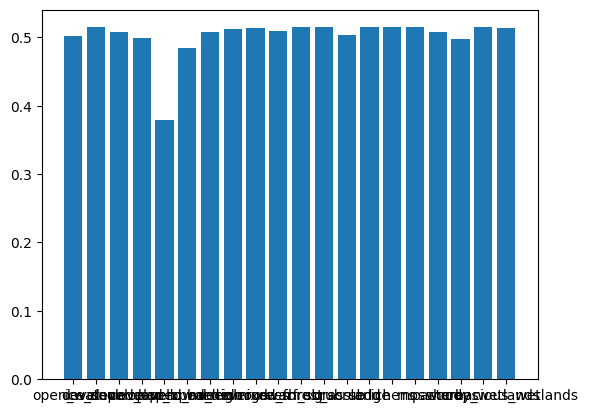

In [36]:
#Part 2
scores = []
for feature in features:
    xi = x_train[features].drop(feature,axis=1)
    model.fit(xi, y_train)
    scores.append(model.score(xi, y_train))
plt.bar(features, scores)

In [37]:
# developed_med seems to have a neat score
feature_scores = {features[i]: scores[i] for i in range(len(features))}
feature_scores

{'open_water': 0.5023505705170543,
 'ice_snow': 0.5151038829791343,
 'developed_open': 0.5078194813455466,
 'developed_low': 0.49873287175619774,
 'developed_med': 0.37969821554905425,
 'developed_high': 0.4840133240027963,
 'barren': 0.5078728254217668,
 'deciduous': 0.5123992992670505,
 'evergreen': 0.5145412326245031,
 'mixed_forest': 0.5100594917792249,
 'dwarf_scrub': 0.5151038829791346,
 'shrub_scrub': 0.5150511459124156,
 'grassland': 0.5036491046303299,
 'sedge': 0.5151038829791346,
 'lichens': 0.5151038829791346,
 'moss': 0.5151038829791346,
 'pasture': 0.507284232117923,
 'crops': 0.4975620239668874,
 'woody_wetlands': 0.5146994959213945,
 'herbacious_wetlands': 0.5139065412223154}

In [38]:
model1 = sklearn.linear_model.LinearRegression()
model1.fit(x_train[['developed_med']],y_train)
#m1scores = model1.score(x_test[['developed_med']],y_test)
#m1score
m1_scores = sklearn.model_selection.cross_val_score(model1, x_train[['developed_med']], y_train, cv=5,scoring='r2')
m1_scores

array([0.34164784, 0.38745383, 0.34999918, 0.35108287, 0.46942386])

In [39]:
#mean crossval model 1
m1_scores.mean()

0.379921514850355

In [40]:
#standard deviation crossval model 1
m1_scores.std()

0.047453753448319674

In [41]:
#variance crossval model 1
m1_scores.std()**2

0.0022518587163339113

In [42]:
first = ["developed_med"]
second = ['developed_open', 'developed_low', 'developed_high', 'barren', 'crops']
both = first + second
imputer_f = sklearn.impute.SimpleImputer(strategy = "median")
imputer_s = sklearn.impute.SimpleImputer(strategy = "median")
transformer_f = sklearn.preprocessing.StandardScaler()
transformer_s = sklearn.preprocessing.StandardScaler()
steps_f = sklearn.pipeline.Pipeline(steps = [("if", imputer_f), ("tf", transformer_f)])
steps_s = sklearn.pipeline.Pipeline(steps = [("is", imputer_s), ("ts", transformer_s)])
pre = sklearn.compose.ColumnTransformer(transformers = [("f", steps_f, first), ("s", steps_s, second)])
model2 = sklearn.pipeline.Pipeline(steps = [("pre", pre), ("clf", sklearn.linear_model.LinearRegression())])
model2.fit(x_train[both],y_train)
#m2scores = model2.score(x_test[both],y_test)
#m2score
m2_scores = sklearn.model_selection.cross_val_score(model2, x_train[both], y_train, cv=5,scoring='r2')
m2_scores

array([0.37712887, 0.44884419, 0.44379107, 0.40507446, 0.53185411])

In [43]:
#mean crossval model 2
m2_scores.mean()

0.441338539534511

In [44]:
#standard deviation crossval model 2
m2_scores.std()

0.05233236784888365

In [45]:
#variance crossval model 2
m2_scores.std()**2

0.002738676724670871

In [46]:
#Q17
# I would recommend the second model using the pipeline as it is simple using only 3 more features than the first model which already uses the feature that has the best r^2 when used to classify labels alone.
# The pipeline makes use of another 3 features but separately through another imputer and scaler so as to allow 'developed_med' its own path in the pipeline giving it more weight while still making use of these 3 new features which also have slightly better r^2 scores than the other features.
# Overall both models' validation scores means are above 0.35 and have variances less than 0.004, which is pretty consistent compared to using all features like normal.
# Though, the second model has some scores on subsets of the data that exceed 0.5 and is nearly always higher than 0.4, using all the features is about the same score if not better at times.
model2.fit(x_train[both],y_train)
model2.score(x_test[both],y_test)

0.4104287990919976